In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
diabetes=load_diabetes()
df=pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)

In [3]:
df.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
df['target']=diabetes.target

In [7]:
df['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [8]:
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

diabetes_df =scaler.fit_transform(df)


In [10]:
diabetes_df

array([[ 0.80050009,  1.06548848,  1.29708846, ...,  0.41853093,
        -0.37098854, -0.01471948],
       [-0.03956713, -0.93853666, -1.08218016, ..., -1.43658851,
        -1.93847913, -1.00165882],
       [ 1.79330681,  1.06548848,  0.93453324, ...,  0.06015558,
        -0.54515416, -0.14457991],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.98564884,
         0.32567395, -0.26145431],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.93616291,
        -0.54515416,  0.88131756],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.08875225,
         0.06442552, -1.23540761]])

In [12]:
scaled_df = pd.DataFrame(diabetes_df, columns=df.columns)
df=scaled_df

In [13]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-0.014719
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,-1.001659
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-0.144580
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.699513
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,-0.222496
...,...,...,...,...,...,...,...,...,...,...,...
437,0.876870,1.065488,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,0.335904
438,-0.115937,1.065488,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,-0.625064
439,0.876870,1.065488,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,-0.261454
440,-0.956004,-0.938537,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,0.881318


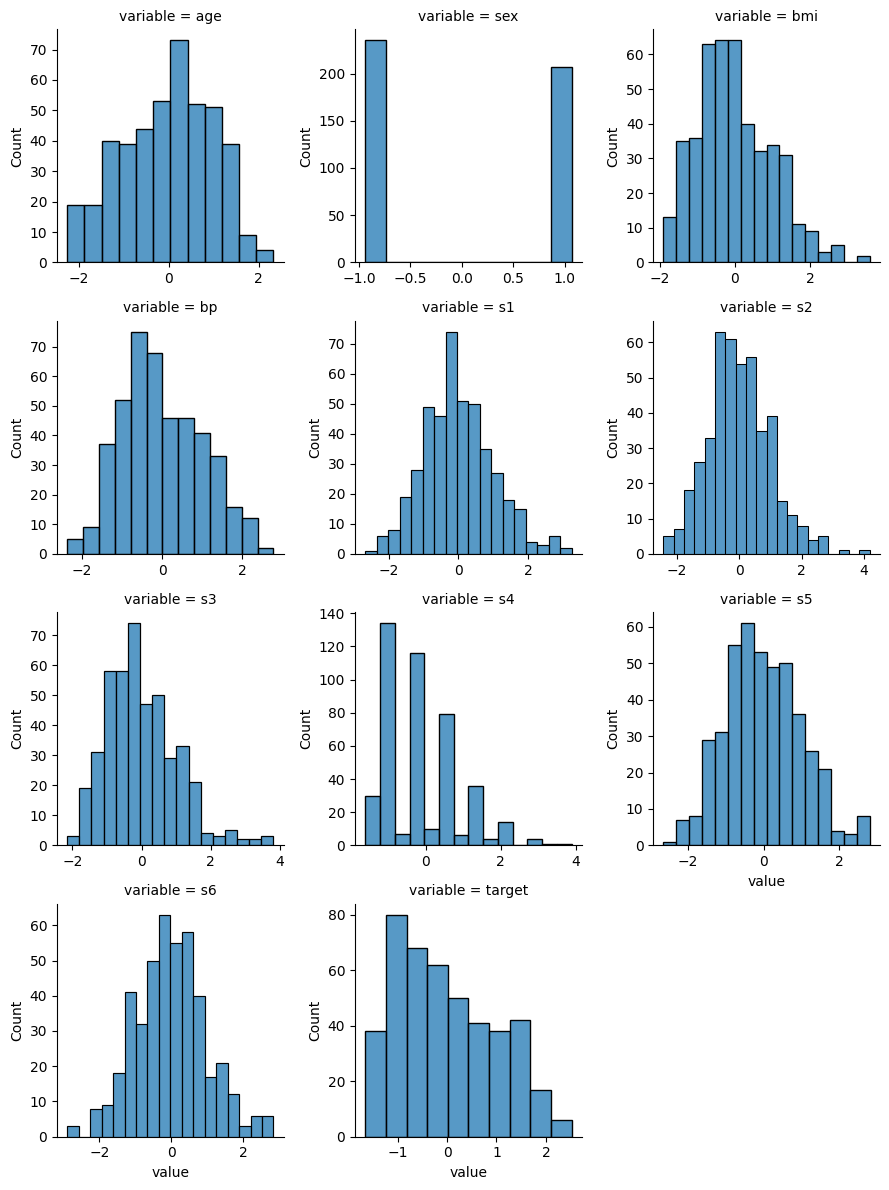

In [15]:
p=sns.FacetGrid(df.melt(),col='variable',col_wrap=3,sharex=False,sharey=False)
p.map(sns.histplot,"value")
plt.show()

<Axes: >

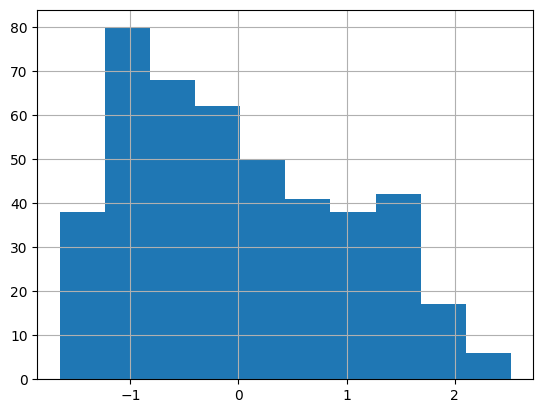

In [16]:
df['target'].hist()

In [17]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [18]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
rf=RandomForestRegressor()
mod=rf.fit(x_train,y_train)

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
results = {}  #//empty dictionary

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}
    print(f'{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}')


Linear Regression - MSE: 0.4891, R²: 0.4526
Decision Tree - MSE: 0.7076, R²: 0.2080
Random Forest - MSE: 0.5138, R²: 0.4249
Gradient Boosting - MSE: 0.4917, R²: 0.4497


In [42]:
#HYPERTUNING
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_random_forest = grid_search.best_estimator_
y_pred = best_rf.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'Best Random Forest - MSE: {mse:.4f}, R²: {r2:.4f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Random Forest - MSE: 0.4943, R²: 0.4468


In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best mean squared error: ", grid_search.best_score_)

best_gradient_boosting = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best mean squared error:  -0.5834109964262175


In [44]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best estimator
best_decision_tree = grid_search.best_estimator_

# Predict on the validation set
y_val_pred = best_decision_tree.predict(x_val)

# Calculate and print the mean squared error and mean absolute error
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 20}
Best cross-validation score:  0.2930661686708397
Mean Squared Error: 0.55
Mean Absolute Error: 0.58


In [47]:
models = {
    'Decision Tree': best_decision_tree,
    'Random Forest': best_random_forest,
    'Gradient Boosting': best_gradient_boosting
}

results = {}
for model_name, model in models.items():
    y_val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, y_val_pred)
    results[model_name] = mse
    print(f'{model_name} Mean Squared Error: {mse:.2f}')

# Find the best model
best_model_name = min(results, key=results.get)
print(f'The best model is {best_model_name} with MSE: {results[best_model_name]:.2f}')


Decision Tree Mean Squared Error: 0.55
Random Forest Mean Squared Error: 0.52
Gradient Boosting Mean Squared Error: 0.48
The best model is Gradient Boosting with MSE: 0.48


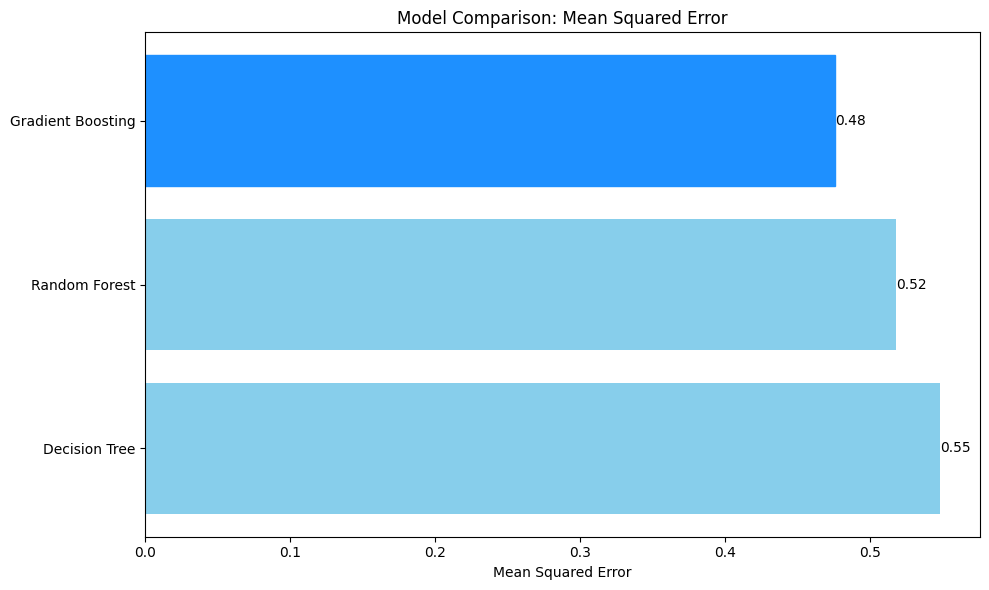

In [53]:
model_names = list(results.keys())
mse_values = list(results.values())
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, mse_values, color='skyblue')

best_index = model_names.index(best_model_name)
bars[best_index].set_color('dodgerblue')

for index, value in enumerate(mse_values):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.xlabel('Mean Squared Error')
plt.title('Model Comparison: Mean Squared Error')
plt.tight_layout()
plt.show()